# FFT Application: Signal smoothing by convolution
In this Jupyter notebook we will smooth a 1D signal with moving average and gaussian kernel.

First some basic imports and functions:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, exp, pi
from numpy.fft import fft, ifft, fft2, ifft2

def plotFT(signal, xlim=20, title='', ift=False, extra_data=None):
    fig, ax = plt.subplots(3 if ift else 2, 1, constrained_layout=True)
    f_signal = fft(signal)
    ax[0].plot(signal)
    ax[0].set_title('Time space: '+title)
    #ax2.plot(f_signal.real*2/len(signal), '.b')
    ax[1].plot(np.abs(f_signal*2/len(signal)), '.k')
    if extra_data is not None:
        ax[1].plot(extra_data)
    ax[1].set_xlim(0, xlim)
    ax[1].set_title('Fourier space: '+title)
    if ift:
        r_signal = ifft(f_signal).real
        ax[2].plot(r_signal)
        ax[2].set_title('Reconstructed: '+title)
    plt.show()
    
def convolution_fft(signal, kernel):
    f_kernel = np.zeros(len(signal))
    f_kernel[:len(kernel)] = kernel
    f_kernel = np.roll( f_kernel, - (len(kernel)//2) ) #centers the kernel around the 0th - entry
    convolution = ( ifft( fft( signal) * fft( f_kernel) ) ).real
    return convolution

Generate a periodic signal with a broad frequency spectrum (frequencies 10-110):

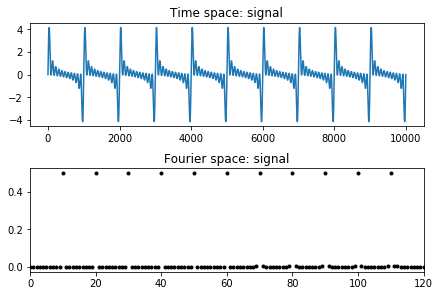

In [2]:
x = np.linspace(0,1,10**4)
signal = 0
for k in range(10,120,10):
    signal += 0.5*sin(k*2*pi*x)
plotFT(signal, xlim=120, title='signal')

Now we add some random noise to the signal:

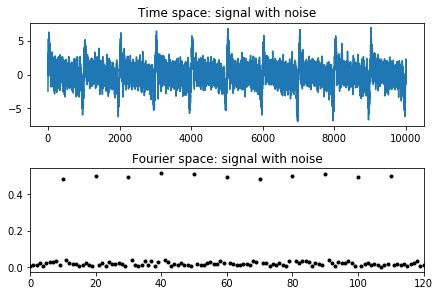

In [3]:
noise = np.random.randn(10**4)
signal += noise
plotFT(signal, xlim=120, title='signal with noise')

We can try signal smoothing to remove the noise from the signal.

Here we generate kernels for `moving average` and `gaussian kernel` smoothing:

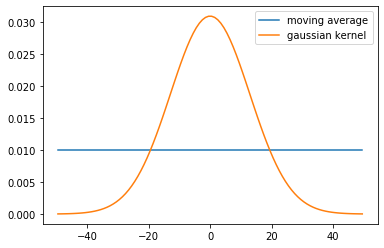

In [4]:
x_ = np.linspace(-49.5,49.5,100) #kernel size: 100
kernel1 = np.ones(100)
kernel1 = kernel1 / np.sum(kernel1) #normalization
gauss = np.exp(-0.003*x_**2)
kernel2 = gauss / np.sum(gauss) #normalization
plt.plot(x_, kernel1, label='moving average')
plt.plot(x_, kernel2, label='gaussian kernel')
plt.legend()
plt.show()

Now smooth the noisy signal with the different kernels:

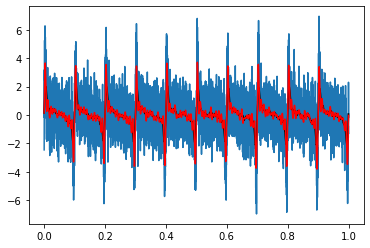

In [7]:
smooth1 = convolution_fft(signal, kernel1)
smooth2 = convolution_fft(signal, kernel2)
plt.plot(x,signal)
plt.plot(x,smooth1, 'k', label='moving average')
plt.plot(x,smooth2, 'r', label='gaussian kernel')
plt.show()

What happens in the frequency space?

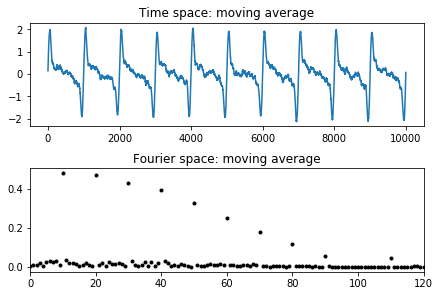

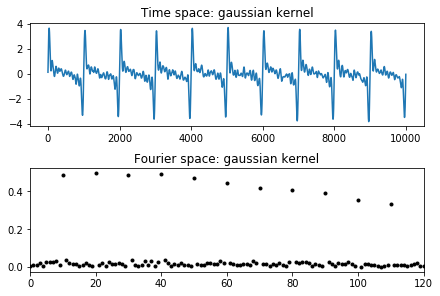

In [8]:
plotFT(smooth1, xlim=120, title='moving average')
plotFT(smooth2, xlim=120, title='gaussian kernel')

Why is this happening?

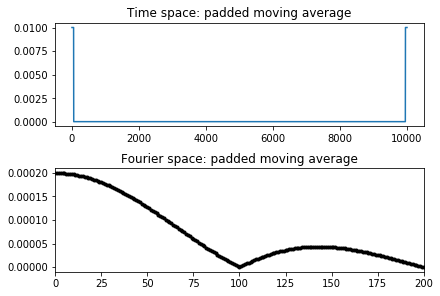

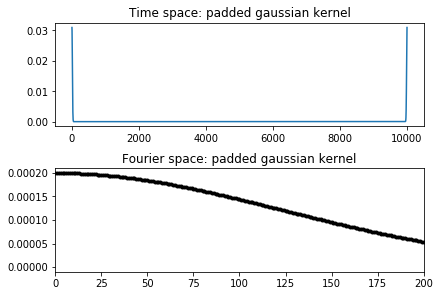

In [9]:
padded_kernel1 = np.zeros(len(signal))
padded_kernel2 = np.zeros(len(signal))
padded_kernel1[0:len(kernel1)] = kernel1
padded_kernel2[0:len(kernel2)] = kernel2
padded_kernel1 = np.roll(padded_kernel1, -len(kernel1)//2)
padded_kernel2 = np.roll(padded_kernel2, -len(kernel2)//2)
plotFT(padded_kernel1, xlim=200, title='padded moving average')
plotFT(padded_kernel2, xlim=200, title='padded gaussian kernel')